## Week 5 Workshop

The goal of the workshop this week is to work through a standard Data Science workflow: exploring data, building models, making predictions, evaluating results.    We will do this in the first instance using a simple linear least squares model and will look at two datasets.  The first is the standard Iris dataset describing flowers, the second is the AutoMPG dataset. 



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

The datasets we will use are available in a number of forms.  We'll use the versions bundled with the __seaborn__ plotting library since they load as Pandas dataframes.  


In [4]:
iris = sns.load_dataset('iris')

## Explore the dataset

Examine the data, what are the columns? How is the spread of variables - eg. is it normally distributed?  You might want to use the [sbs.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function which shows all variables plotted against each other as a matrix.  You should also look at the means and variances of each variable.  Get to know the Pandas methods (e.g. the `describe` method) for doing this.

Your goal is to get a good feel for the data you are dealing with. Eventually you will be trying to work out what techniques you might be able to use to work with the data. For now, just get used to exploring it.

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.shape

(150, 5)

In [7]:
print(iris.isnull().values.any())

False


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


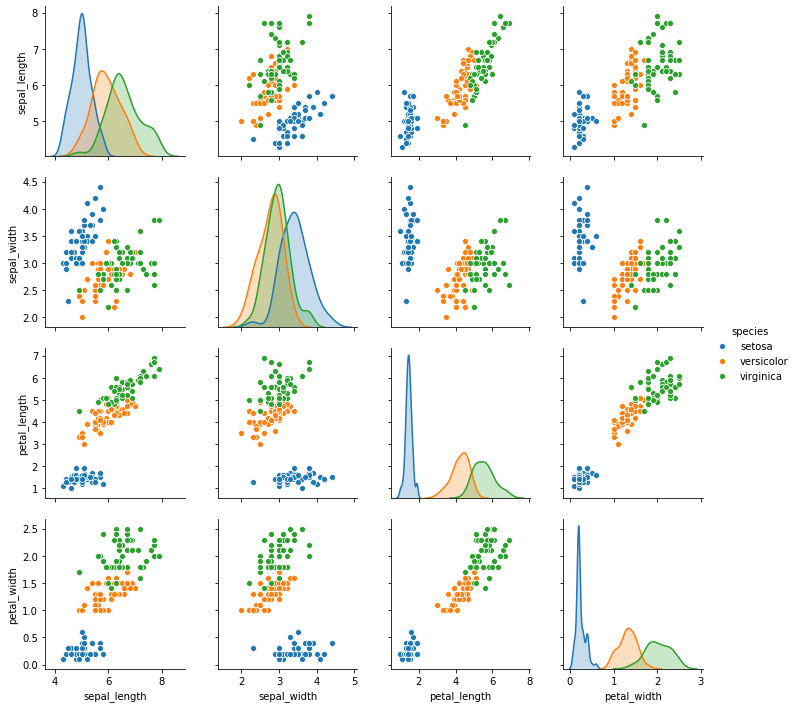

In [9]:
sns.pairplot(iris,hue = 'species')

In [10]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


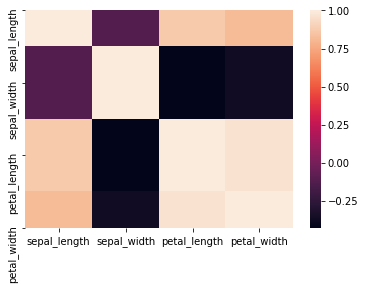

In [16]:
sns.heatmap(iris.corr())

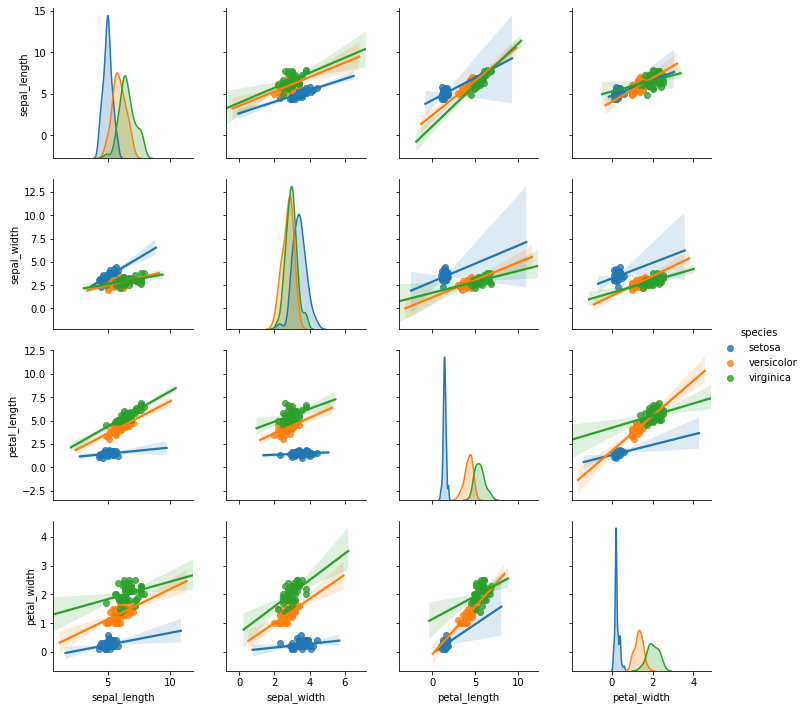

In [17]:
sns.pairplot(iris,hue = 'species',kind = 'reg')

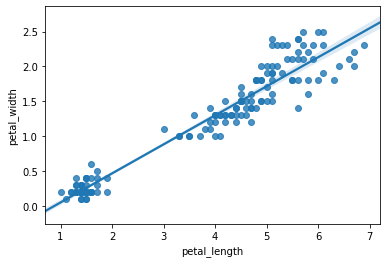

In [18]:
sns.regplot('petal_length','petal_width',data=iris)

#### By looking at the graph, we can conclude that the petal_length and petal_width are corelated with each other and sepal_length.

## Linear Regression

A quick search will reveal many different ways to do linear regression in Python. We will use the [sklearn LinearRegression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) function.  The sklearn module has many standard machine learning methods so it is a good one to get used to working with.  

Linear Regression involves fitting a model of the form:

> $y = O_1X + O_2$

Where $y$ is the (numerical) variable we're trying to predict, $X$ is the vector of input variables, $O_1$ is the array of model coefficients and $O_2$ is the intercept.  In the simple case when X is one-dimensional (one input variable) then this is the forumula for a straight line with gradient $O_1$.

We will first try to predict `petal_width` from `petal_length` in the iris data.  You should look at the plot of these two variables to see that they are roughly correlated.  Here is the code using `slkearn` to do this.   We first create a linear model, then select the data we will use to train it - note that `X` (the input) is a one-column pandas dataframe while `y` (the output) is a Series.  The `fit` method is used to train the model.  The result is a set of coefficients (in this case just one) and an intercept.  


In [19]:
reg = linear_model.LinearRegression()
X = iris[['petal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.41575542] + -0.3630755213190291


We can now use the `predict` method to predict the value of `petal_width` from some values of `petal_length`:

In [20]:
reg.predict(X[:3])

array([0.21898206, 0.21898206, 0.17740652])

Prediction in this case is just using the formual $y = x * O_1 + O_2$ - confirm this is the case by evaluating some sample values from `petal_length` (use `reg.coef_` and `reg.intercept_`).

In [21]:
1.4*reg.coef_ + reg.intercept_

array([0.21898206])

In [22]:
1.3*reg.coef_ + reg.intercept_

array([0.17740652])

## Evaluating the model

How well does this model fit the data? We can measure the _mean squared error_ which is based on the difference between the real and predicted values of `petal_width` (mean of the squared differences).  Another measure is $R^2$ which measures the amount of variance in the data that is explained by the model.  Smaller MSE is better.  $R^2$ close to 1 is better.

Note that here I need to convert the output Series (`y`) to an `np.array`, this is because the sklearn library really works with numpy datastructures rather than pandas Series and Dataframes. I could have used [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) here but I wanted to show you that this is just a simple calculation on the results.

In [23]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.04206730919499318
R Squared: 0.9271098389904927


## More Input Variables

Linear regression can work with more input variables, in this case the formula $y = x * O_1 + O_2$ becomes a matrix expression with $x$ and $O_1$ being vectors rather than scalars.  The code is almost exactly the same but we select two columns for the input array $X$.  Here we add `sepal_length`.  Note that the coefficients in the model is now a vector of two values:

In [24]:
reg = linear_model.LinearRegression()
X = iris[['petal_length', 'sepal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 0.44937611 -0.08221782] + -0.00899597269816943


You can test the model in the same way as before.  Did the model get better? 

In [25]:
reg.predict(X[:3])

array([0.2008197 , 0.21726327, 0.18876922])

In [26]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.040962085264089815
R Squared: 0.9290248640257687


In [27]:
reg = linear_model.LinearRegression()
X = iris[['petal_length', 'sepal_length', 'sepal_width']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 0.52408311 -0.20726607  0.22282854] + -0.24030738911226113


In [28]:
reg.predict(X[:3])

array([0.2162519 , 0.14629084, 0.17990145])

In [29]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.035868651138184555
R Squared: 0.9378502736046809


# Yes the model is getting better.

## Training and Testing Data

What we have done so far is to train and test the model on the same data. This is not good practice as we have no idea how good the model would be on new data.   Better practice is to split the data into two sets - training and testing data.  We build a model on the training data and test it on the test data.  

Sklearn provides a function [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to do this common task.  It returns two arrays of data. Here we ask for 20% of the data in the test set. 

In [30]:
#splitting the data into train and test
train, test = train_test_split(iris, test_size=0.2,random_state = 6)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [31]:
#training and testing the data
X_train = train[['petal_length', 'sepal_length','sepal_width']]
y_train = train['petal_width']
X_test = test[['petal_length', 'sepal_length','sepal_width']]
y_test = test['petal_width']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 3)
(120,)
(30, 3)
(30,)


In [32]:
#model on train set
reg = linear_model.LinearRegression()
X_train = train[['petal_length', 'sepal_length','sepal_width']]
y_train = train['petal_width']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 0.54060944 -0.24737687  0.24346995] + -0.12114936291138267


In [33]:
#predicting on test set
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.03977704531281755
R Squared: 0.9238959592229256


In [34]:
#predicted y_test value
predicted

array([0.2753113 , 1.97466274, 0.19807544, 0.33971546, 1.62673147,
       1.44542497, 2.03028646, 0.25594056, 2.02374742, 1.24069649,
       1.74924782, 1.10286065, 1.93997253, 2.00217616, 1.3263221 ,
       1.6332705 , 2.29721857, 1.50748497, 1.23952441, 0.40163184,
       0.30004898, 2.03252787, 0.56957232, 0.22622662, 1.58326081,
       1.57803748, 1.25903876, 2.0424804 , 0.31117359, 0.98595831])

In [35]:
#Real y_test value
y_test.head()

4      0.2
116    1.8
2      0.2
23     0.5
123    1.8
Name: petal_width, dtype: float64

In [36]:
#predicting Train set
predict_train = reg.predict(X_train)
mse = ((np.array(y_train)-predict_train)**2).sum()/len(y_train)
r2 = r2_score(y_train, predict_train)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.03525368819888655
R Squared: 0.9403237754706574


In [37]:
#predicted y_train value
predict_train

array([0.1787047 , 1.35823658, 0.19534059, 0.14021031, 1.75920035,
       2.00476738, 1.14579699, 1.63209842, 1.46977196, 0.20227031,
       0.22622662, 2.05385207, 1.21400534, 1.42029659, 0.40738949,
       0.1787047 , 1.57569332, 0.25554987, 0.23237496, 1.43942025,
       2.33727574, 2.52131778, 1.82424227, 0.32556806, 1.81823756,
       0.31302431, 0.22359451, 0.28984939, 1.43902956, 1.96563523,
       1.80906642, 1.02103922, 1.36701703, 2.36748382, 1.42146867,
       1.44044871, 0.30658802, 1.85854179, 0.06667589, 0.36025827,
       1.28939048, 1.70616786, 1.85854179, 2.00476738, 1.81247991,
       1.35486397, 1.59243195, 1.84599804, 1.96368176, 1.37579748,
       0.84773178, 0.23237496, 2.13684558, 1.90044968, 0.32898155,
       0.27687407, 1.78052455, 2.30965958, 1.58706499, 2.17558704,
       1.47332908, 0.29770483, 1.66469154, 2.00359531, 0.07321492,
       0.28067825, 2.1849018 , 0.2722885 , 0.27950617, 0.54639741,
       0.02842786, 0.15801827, 0.06980143, 1.20981046, 1.68381

In [38]:
#Real y_train Value
y_train

45     0.3
59     1.4
16     0.4
13     0.1
133    1.5
      ... 
148    2.3
79     1.0
109    2.5
106    1.7
138    1.8
Name: petal_width, Length: 120, dtype: float64

You can now repeat the above procedure but this time train the model on the training data and evaluate on the test data.  Do the MSE and $R^2$ values change? 

**This is your checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

 # Yes the MSE and $R^2$ values slightly changed compared to previous one. The model is overfitting. When a model is overfitted, if it performs well on the training set but generalizes poorly on the test sets. When a model performs poorly on the training set then it is under fitted.

# Auto MPG Dataset

This dataset contains details of different US cars with measures of various physical features and the miles-per-gallon (mpg) measure of fuel consumption.   The goal is to predict MPG from other features. 

- explore this dataset, look at summary statistics, plot the data get an idea of how the variables vary together
- split the data into training and testing sets
- use a least squares linear model to predict MPG from the **weight** of the car, evaluate the result
- add other features to the model, evaluate the results. What is the most accurate model? 
- Evaluate model performance in terms of MSE and $R^2$ scores. Comment on whether adding more features improves model's performance.

In [43]:
mpg = sns.load_dataset('mpg')

In [44]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [45]:
mpg.shape

(398, 9)

In [46]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [47]:
print(mpg.isnull().values.any())

True


In [48]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

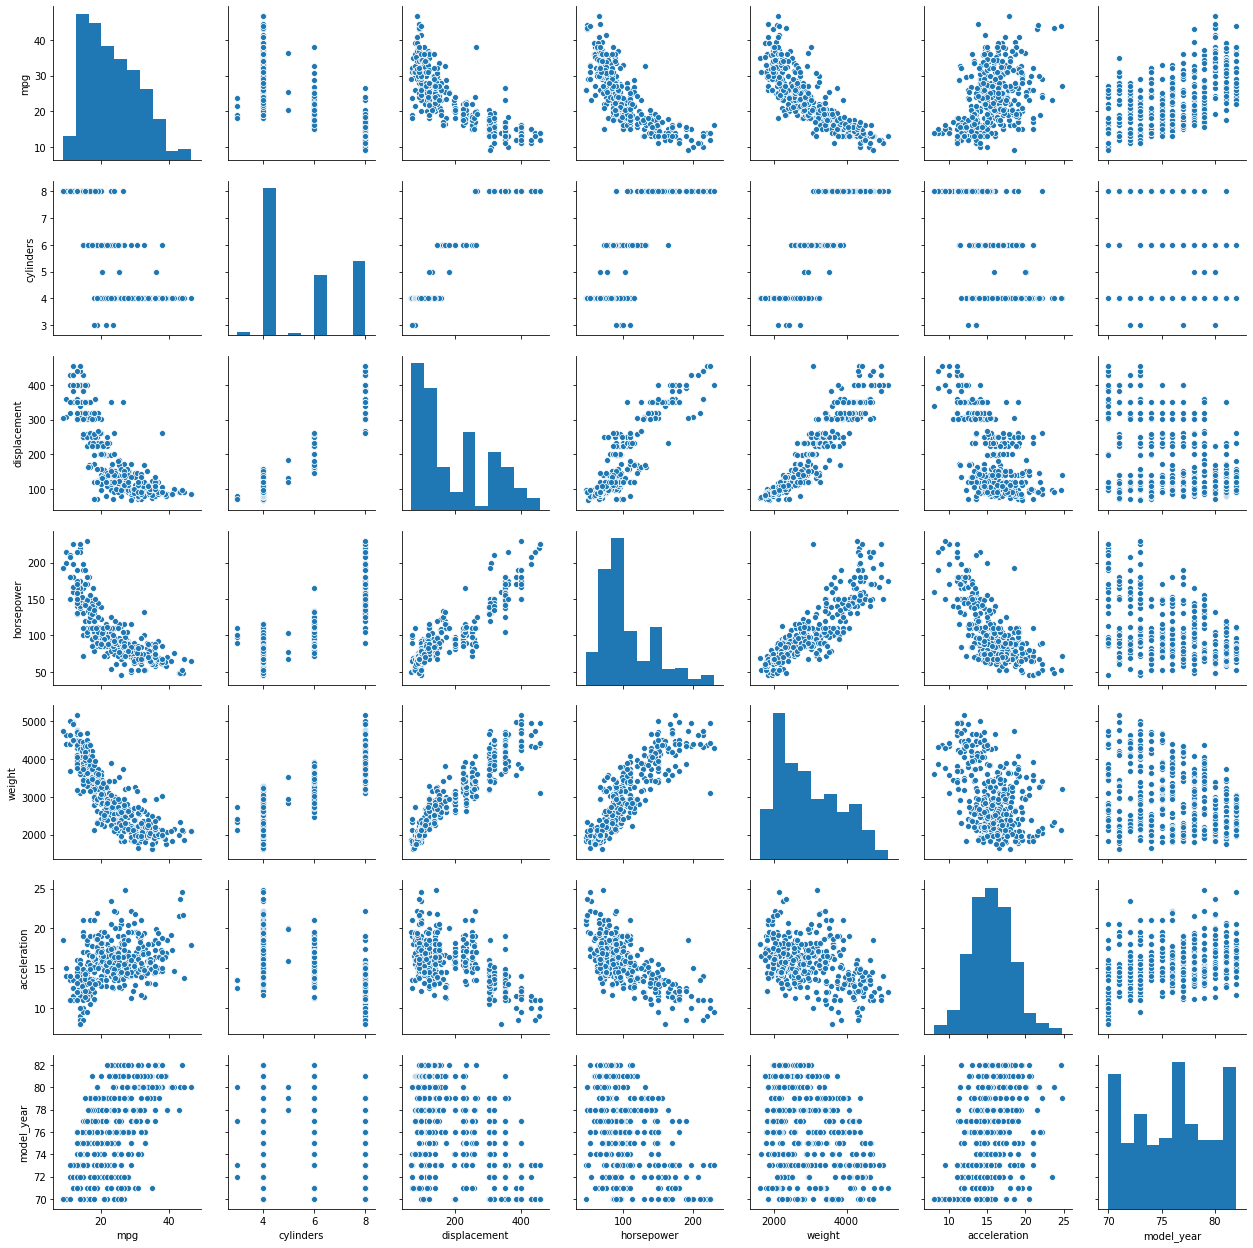

In [50]:
sns.pairplot(mpg)

In [51]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [52]:
train, test = train_test_split(mpg, test_size=0.2,random_state = 6)
print(train.shape)
print(test.shape)

(318, 9)
(80, 9)


In [53]:
X_train = train[['weight']]
y_train = train['mpg']
X_test = test[['weight']]
y_test = test['mpg']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(318, 1)
(318,)
(80, 1)
(80,)


In [54]:
reg = linear_model.LinearRegression()
X_train = train[['weight']]
y_train = train['mpg']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.00756972] + 45.96759809038848


In [55]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 21.98136303092862
R Squared: 0.6985451074893023


In [56]:
train, test = train_test_split(mpg, test_size=0.2,random_state = 6)
print(train.shape)
print(test.shape)

(318, 9)
(80, 9)


In [57]:
#adding another feature
X_train = train[['weight','cylinders']]
y_train = train['mpg']
X_test = test[['weight','cylinders']]
y_test = test['mpg']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(318, 2)
(318,)
(80, 2)
(80,)


In [58]:
reg = linear_model.LinearRegression()
X_train = train[['weight','cylinders']]
y_train = train['mpg']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.00669719 -0.47734495] + 45.9767976044616


In [59]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 21.245550480482077
R Squared: 0.708636123819399


In [60]:
train, test = train_test_split(mpg, test_size=0.2,random_state = 6)
print(train.shape)
print(test.shape)

(318, 9)
(80, 9)


In [61]:
#adding multiple features
X_train = train[['weight','cylinders','acceleration','model_year','displacement']]
y_train = train['mpg']
X_test = test[['weight','cylinders','acceleration','model_year','displacement']]
y_test = test['mpg']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(318, 5)
(318,)
(80, 5)
(80,)


In [62]:
reg = linear_model.LinearRegression()
X_train = train[['weight','cylinders','acceleration','model_year','displacement']]
y_train = train['mpg']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.00742158 -0.16252763  0.1170478   0.73014061  0.01100061] + -13.009005709994703


In [63]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 13.831903332669507
R Squared: 0.8103077172010977


In [64]:
predicted

array([18.03608396, 10.39459493, 20.07338579,  8.53961393, 21.50904495,
       24.14789949, 27.07221949, 27.42877481, 32.80813672, 34.09351765,
       28.81553762, 26.61716701, 33.62426323, 21.65909976, 15.74124933,
       22.8694965 , 33.30722676, 26.00045558, 28.25856436, 17.38475083,
       25.82438246, 24.73274319, 21.99914655, 25.6639405 ,  7.94433106,
       25.64445952, 15.10486765, 34.03043783, 22.37161897,  7.19128342,
       24.12848822, 12.74120337, 16.60803179, 26.29828856, 23.29163038,
       30.40541091, 23.95759659, 22.02706994, 22.51905993, 12.75372999,
       32.06660365, 22.208686  , 15.75478338, 16.74832169, 22.27315212,
       29.11993224, 24.64819845, 34.46358685, 29.25189959, 11.72154921,
       33.63853038, 32.04616245, 19.84517678, 33.82920874, 15.69910191,
       20.02781812, 30.92359917, 26.06591409, 21.99893855, 24.18961648,
       32.63360504, 28.02736259, 27.74023839, 14.06799576, 18.45030153,
       30.90945318, 31.02819842, 18.15595781, 29.02589031, 31.62

In [65]:
y_test

134    16.0
137    13.0
13     14.0
95     12.0
263    17.7
       ... 
207    20.0
221    17.5
90     12.0
232    16.0
140    14.0
Name: mpg, Length: 80, dtype: float64

# Yes adding more features improves model's performance.